In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
input_dir = os.getcwd()
categories = ['empty','not_empty']

In [ ]:
#Mengganti warna (akurasi warna)

In [3]:
data = []
labels = []
images = []
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, category)):
    img_path = os.path.join(input_dir, category, file)
    img = imread(img_path)
    img = resize(img, (15, 15))
    data.append(img.flatten())
    labels.append(category_idx)
    images.append(img)


In [28]:
emptnempt = {
    0 : "empty",
    1 : "not_empty"
}

In [29]:
show(os,color='gray',consecutive : 'yes',batch_size=6)

SyntaxError: positional argument follows keyword argument (2351511434.py, line 1)

In [4]:
data = np.asarray(data)
labels = np.asarray(labels)
images = np.asarray(images)

In [5]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# EDA

array([0, 0, 0, ..., 1, 1, 0])

# SVC

In [6]:
# train classifier
classifier = SVC()
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}]
grid_search = GridSearchCV(classifier, parameters,
                           cv=5,verbose=2,scoring='accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................................C=1, gamma=0.01; total time=   2.9s
[CV] END ....................................C=1, gamma=0.01; total time=   2.2s
[CV] END ....................................C=1, gamma=0.01; total time=   2.4s
[CV] END ....................................C=1, gamma=0.01; total time=   2.6s
[CV] END ....................................C=1, gamma=0.01; total time=   2.6s
[CV] END ...................................C=1, gamma=0.001; total time=   9.8s
[CV] END ...................................C=1, gamma=0.001; total time=  10.2s
[CV] END ...................................C=1, gamma=0.001; total time=   7.9s
[CV] END ...................................C=1, gamma=0.001; total time=   7.7s
[CV] END ...................................C=1, gamma=0.001; total time=   9.0s
[CV] END ..................................C=1, gamma=0.0001; total time=  28.6s
[CV] END ..................................C=1, g

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=2)

# **CNN**

In [8]:
imagg = x_train.reshape((x_train.shape[0],30,30,3))
test_imagg = x_test.reshape((x_test.shape[0],30,30,3))

In [9]:
x_train_CNN = imagg/255
x_test_CNN = test_imagg/255

In [10]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [11]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(30,30,3),strides=1))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(30,30,3),strides=1))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,restore_best_weights=True)
history = model.fit(x_train_CNN,y_train, validation_data=(x_test_CNN,y_test),
                    epochs=20,callbacks=[early_stop])

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5225 - loss: 0.6912 - val_accuracy: 0.8859 - val_loss: 0.5143
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9348 - loss: 0.3063 - val_accuracy: 0.9836 - val_loss: 0.0697
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9813 - loss: 0.0640 - val_accuracy: 0.9943 - val_loss: 0.0336
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9905 - loss: 0.0341 - val_accuracy: 0.9959 - val_loss: 0.0331
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9946 - loss: 0.0230 - val_accuracy: 0.9967 - val_loss: 0.0143
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9979 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9967 - loss: 0.0145 - val_accuracy: 0.9975 - val_loss: 0.0092
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9988 - loss: 0.0075 - val_accu

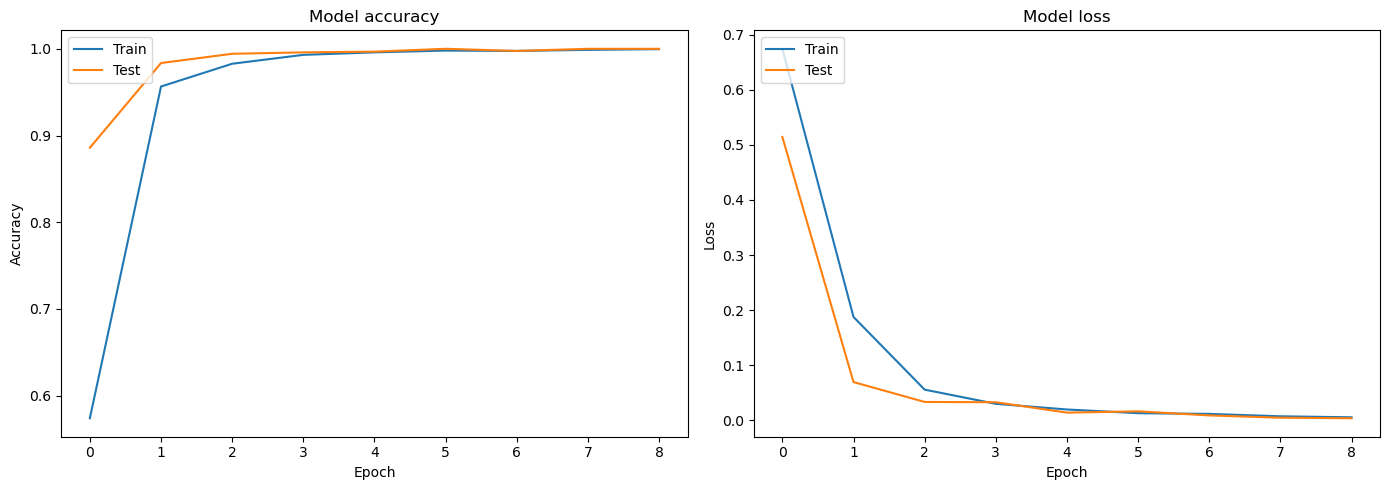

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion Matrix:
 [[609   0]
 [  0 609]]

Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00       609
   Not Empty       1.00      1.00      1.00       609

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218



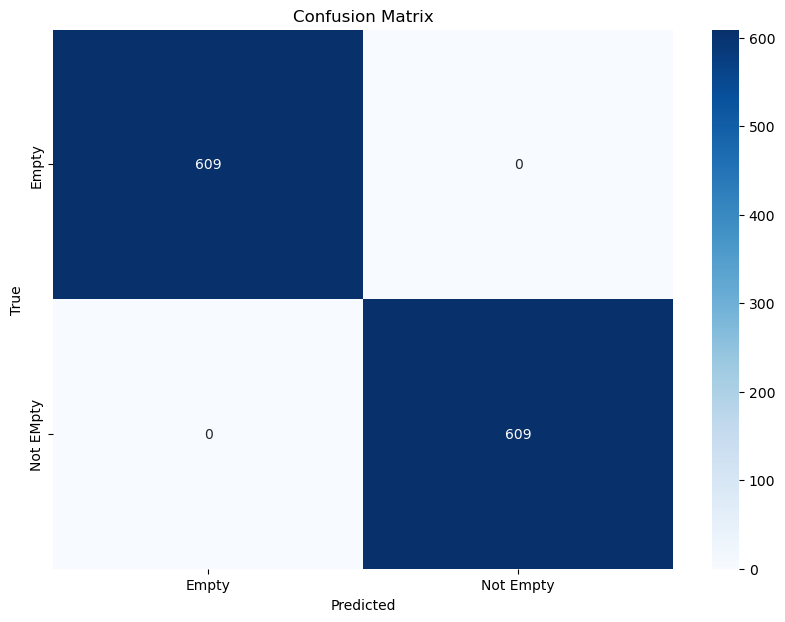

In [14]:
y_predCNN = model.predict(x_test_CNN)
y_pred_CNN = (y_predCNN > 0.5).astype(int)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_CNN)
print("Confusion Matrix:\n", cm)

# Generate the classification report
report = classification_report(y_test, y_pred_CNN, target_names=['Empty', 'Not Empty'])
print("\nClassification Report:\n", report)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Empty', 'Not Empty'], yticklabels=['Empty', 'Not EMpty'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# CNN - SVM

In [15]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2
modelCS = models.Sequential()
modelCS.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(30,30,3),strides=1))
modelCS.add(layers.MaxPooling2D(2,2))
modelCS.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(30,30,3),strides=1))
modelCS.add(layers.MaxPooling2D(2,2))
modelCS.add(layers.Flatten())
modelCS.add(layers.Dense(64,activation='relu'))
modelCS.add(layers.Dense(1,activation='linear',kernel_regularizer=l2(0.01)))

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
modelCS.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='hinge',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,restore_best_weights=True)
historyCS = modelCS.fit(x_train_CNN,y_train, validation_data=(x_test_CNN,y_test),
                    epochs=20,callbacks=[early_stop])

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5729 - loss: 0.8978 - val_accuracy: 0.8777 - val_loss: 0.2715
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9364 - loss: 0.1688 - val_accuracy: 0.9819 - val_loss: 0.0674
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9713 - loss: 0.0762 - val_accuracy: 0.9836 - val_loss: 0.0480
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9832 - loss: 0.0478 - val_accuracy: 0.9811 - val_loss: 0.0410
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9834 - loss: 0.0460 - val_accuracy: 0.9967 - val_loss: 0.0274
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9938 - loss: 0.0291 - val_accuracy: 0.9959 - val_loss: 0.0214
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9955 - loss: 0.0254 - val_accuracy: 0.9885 - val_loss: 0.0261
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9967 - loss: 0.0196 - val_accu

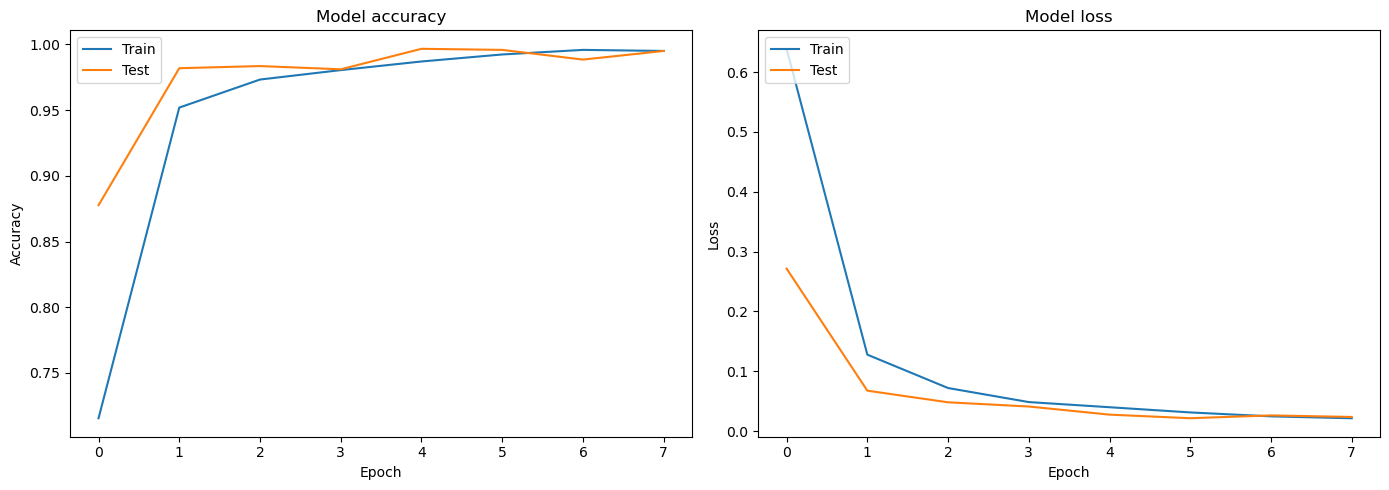

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(historyCS.history['accuracy'])
plt.plot(historyCS.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(historyCS.history['loss'])
plt.plot(historyCS.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
 [[609   0]
 [  4 605]]

Classification Report:
               precision    recall  f1-score   support

       Empty       0.99      1.00      1.00       609
   Not Empty       1.00      0.99      1.00       609

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218



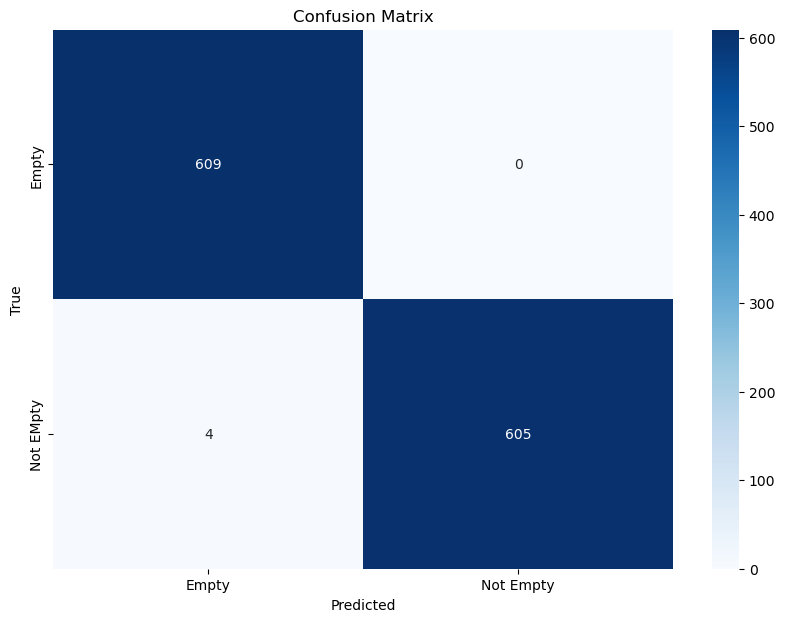

In [18]:
y_predCS = modelCS.predict(x_test_CNN)
y_pred_CS = (y_predCS > 0.5).astype(int)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_CS)
print("Confusion Matrix:\n", cm)

# Generate the classification report
report = classification_report(y_test, y_pred_CS, target_names=['Empty', 'Not Empty'])
print("\nClassification Report:\n", report)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Empty', 'Not Empty'], yticklabels=['Empty', 'Not EMpty'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

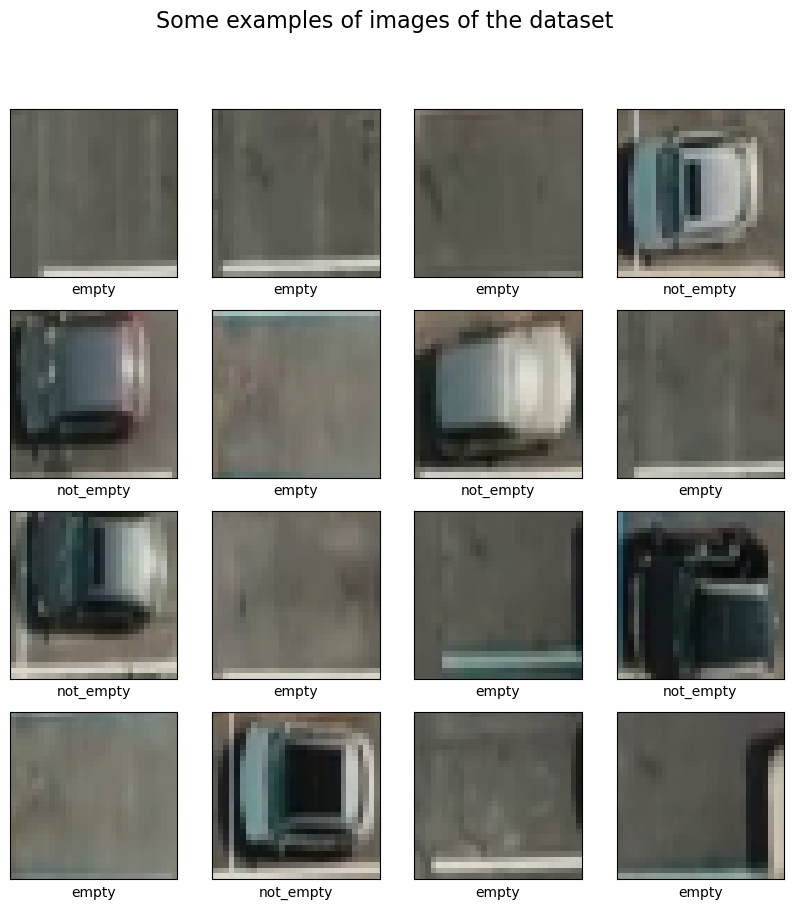

In [20]:

display_examples(categories, imagg, y_train)

In [21]:
def display_test(class_names, images, true_labels, test_labels):
    fig = plt.figure(figsize=(14,14))
    fig.suptitle("Some examples of images of the test set", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"True Label : {class_names[true_labels[i]]} \n Predicted Label : {class_names[test_labels[i]]}")
    plt.tight_layout()
    plt.show()

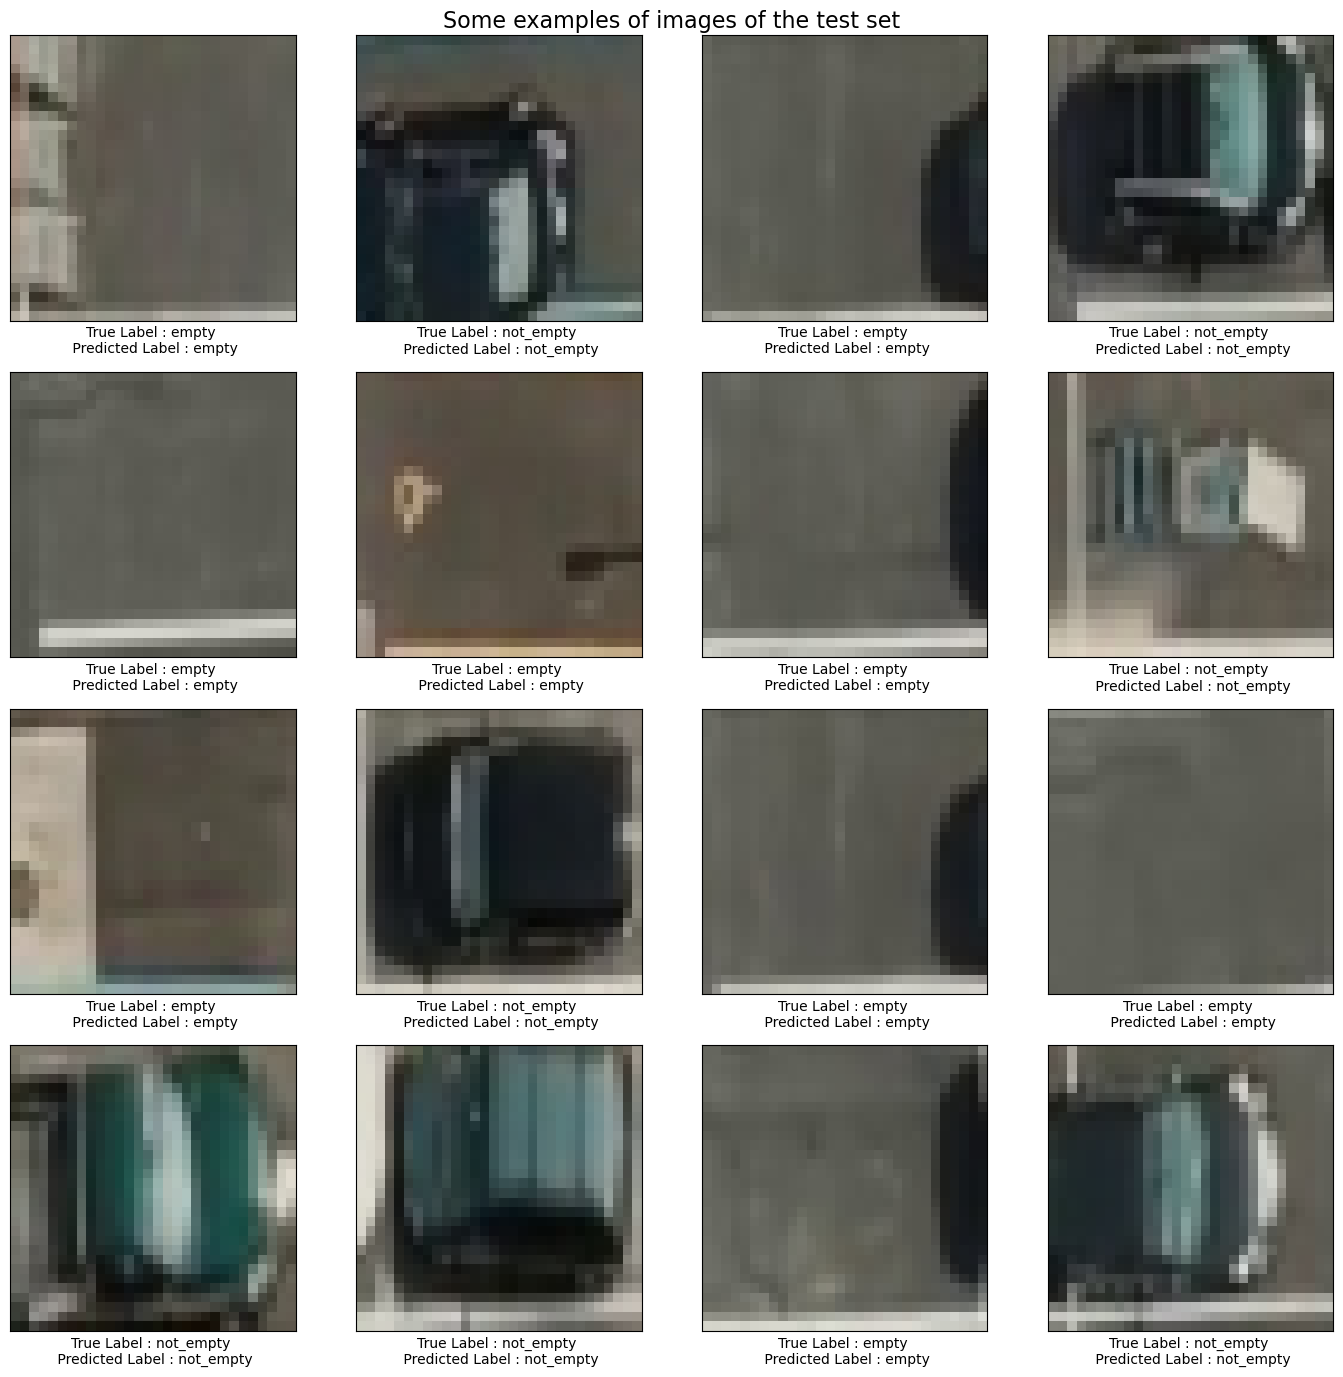

In [22]:

display_test(categories, test_imagg, y_test, y_pred_CS.reshape(-1))